<a href="https://colab.research.google.com/github/swat90/Omdena_Advanced_ML_DS/blob/main/Assignment2_Swati.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning Mastery Assignment

Task 1: Data Preparation


*   Load a dataset of your choice.
*   Perform necessary data preprocessing steps such as handling missing values, encoding categorical variables, and scaling numerical features.



In [1]:
#Bank Churn dataset from Kaggle
#Load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Load the dataset in pandas dataframe
train = pd.read_csv(r"/content/drive/MyDrive/Omdena_ML_DS/train.csv") #training data

#Info on both the datasets
train.info()

#Train data has 165034 entries and 14 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


Data cleaning and preprocessing

In [ ]:
#check for duplicates in both train and test
dupli_train = train.duplicated().sum()
print(dupli_train)
#no duplicates

0


In [ ]:
#check for missing values
print(train.isna().sum())
#no missing values

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [ ]:
print(train.head()) #print first 5 rows

   id  CustomerId         Surname  CreditScore Geography Gender   Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male  33.0       3   
1   1    15749177   Okwudiliolisa          627    France   Male  33.0       1   
2   2    15694510           Hsueh          678    France   Male  40.0      10   
3   3    15741417             Kao          581    France   Male  34.0       2   
4   4    15766172       Chiemenam          716     Spain   Male  33.0       5   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              2        1.0             0.0        181449.97   
1       0.00              2        1.0             1.0         49503.50   
2       0.00              2        1.0             0.0        184866.69   
3  148882.54              1        1.0             1.0         84560.88   
4       0.00              2        1.0             1.0         15068.83   

   Exited  
0       0  
1       0  
2       0  
3       0  
4 

In [3]:
#drop columns with private information of customers
train = train.drop(["id", "CustomerId", "Surname"], axis = 1)

print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  object 
 2   Gender           165034 non-null  object 
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 13.9+ MB
None


In [4]:
#separate out numerical and categorical columns
numeric_col = train.select_dtypes(include = "number").columns
print(numeric_col)

categoric_col = train.select_dtypes(exclude = "number").columns
print(categoric_col)

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')
Index(['Geography', 'Gender'], dtype='object')


In [ ]:
#check unique values in categorical columns
train[categoric_col].nunique()
#Gender has 2 and Geography has 3 unqiue values

Geography    3
Gender       2
dtype: int64

In [ ]:
print(train['Geography'].value_counts())
print(train['Gender'].value_counts())

France     94215
Spain      36213
Germany    34606
Name: Geography, dtype: int64
Male      93150
Female    71884
Name: Gender, dtype: int64


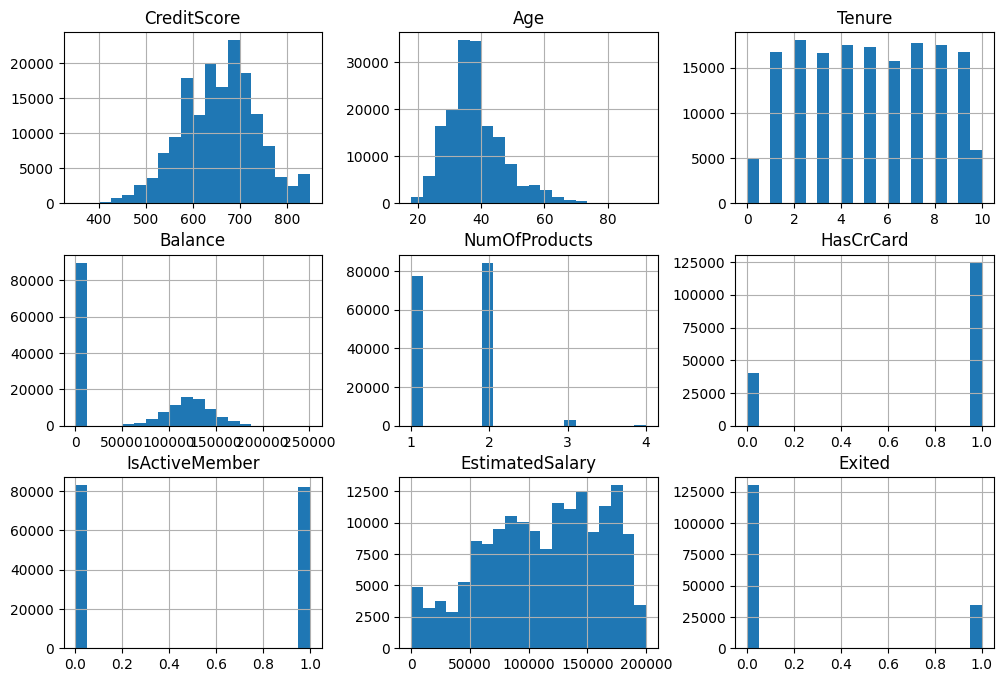

In [ ]:
#Univariate plots
#Histogram
train[numeric_col].hist(bins=20, figsize=(12, 8))
plt.show()

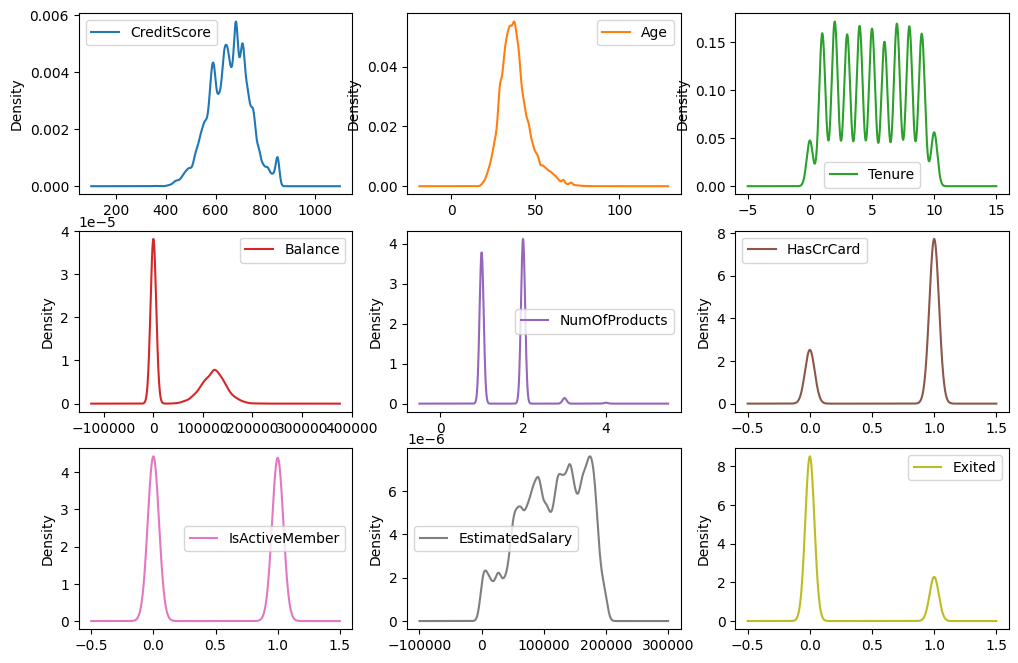

In [ ]:
#density plot
train[numeric_col].plot(kind ='density',subplots = True, layout =(3,3),sharex = False, figsize = (12,8))
plt.show()


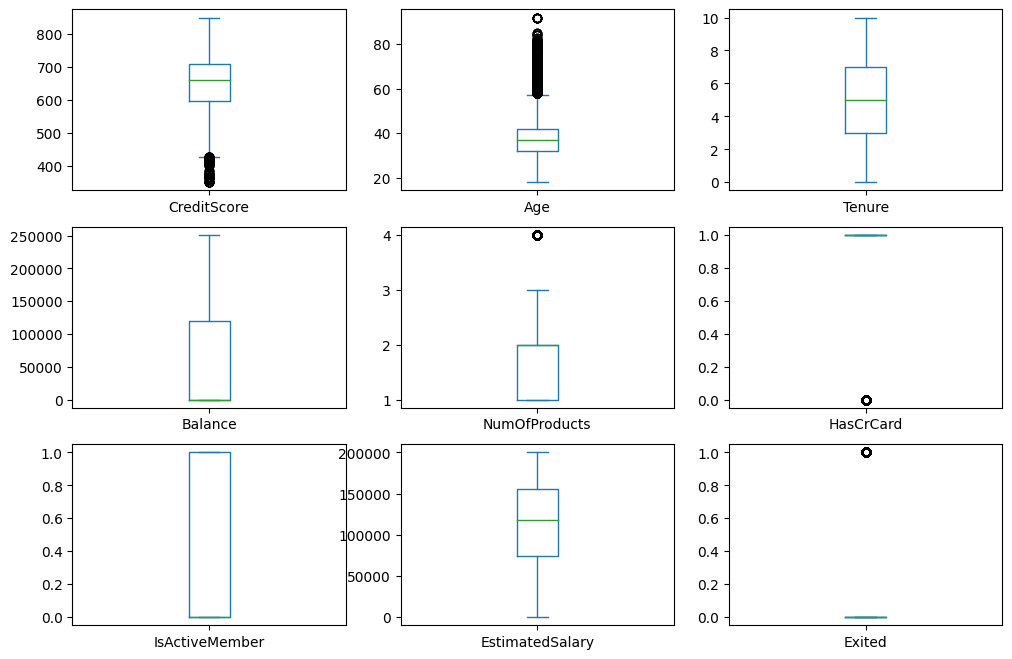

In [ ]:
train[numeric_col].plot(kind ='box', subplots = True, layout =(3,3), sharex = False, sharey = False, figsize=(12, 8))
plt.show()
#age and credit score has outliers

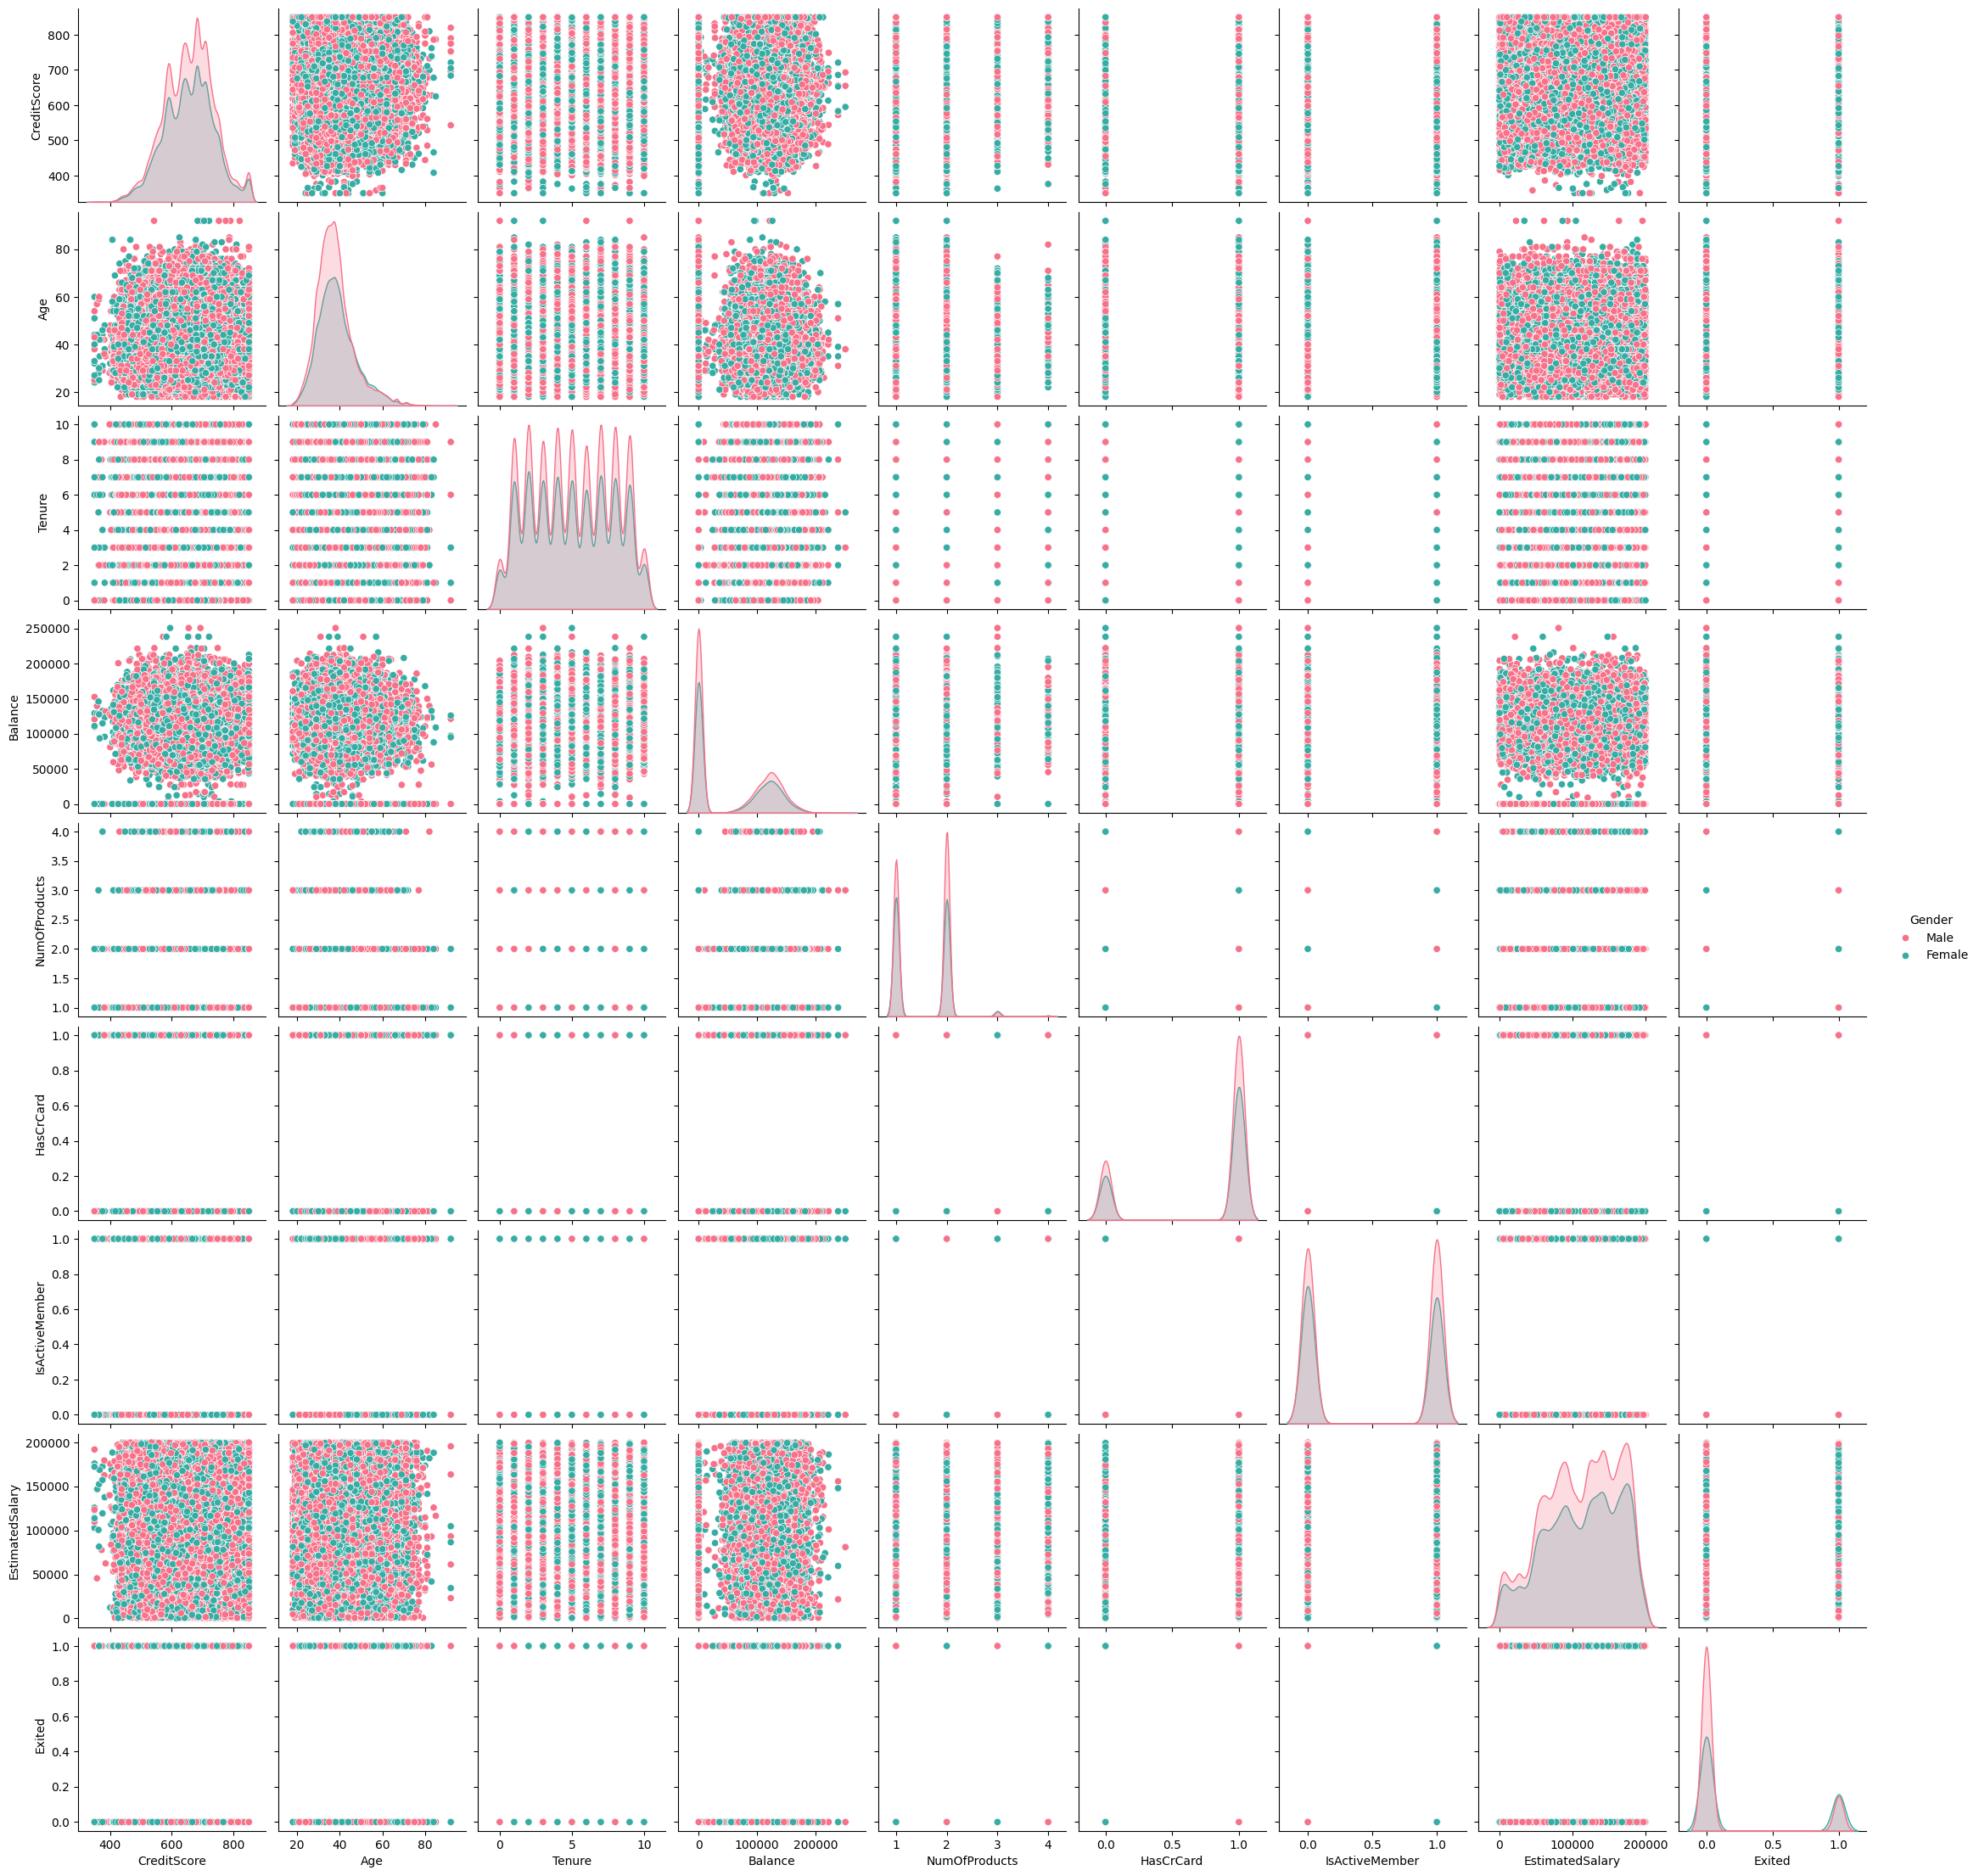

In [ ]:
#scatter plots/coorelation plots

#Define custome pallete
custom_palette = sns.color_palette("husl", 2)

# Create pairplot with custom palette and increased figure size
plot = sns.pairplot(train, hue='Gender', palette=custom_palette)

plt.show()

<ipython-input-28-d3613624a16b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train.corr()


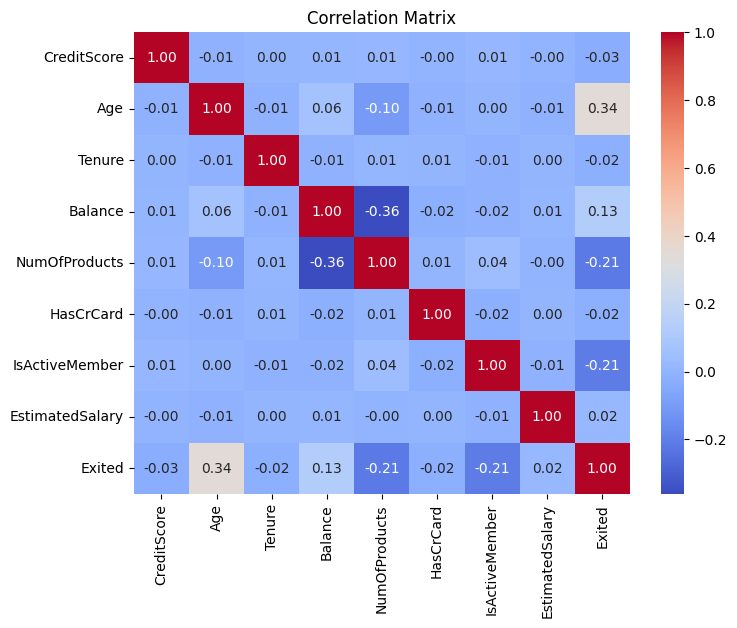

In [ ]:
# Correlation matrix
correlation_matrix = train.corr()

# heatmap of the correlations
plt.figure(figsize = (8, 6))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", fmt= '.2f')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
#we install dython libraray to check coorelations b/w all the columns, numerical as well as categorical
!pip install dython

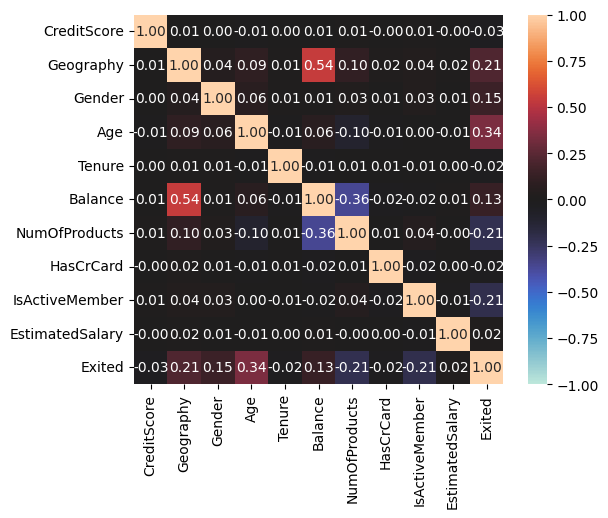

corr


In [ ]:
from dython.nominal import associations

# Calculate associations between categorical variables
correlation_matrix, _ = associations(train)

# Display the correlation matrix
print(correlation_matrix)

#No strong correlations found
#There is moderate strong correlation between Geography and balance

In [8]:
#Identify and handle outliers in teh data
# Define the outlier criteria
# using the IQR method to identify outliers
def outlier(dataset, column):
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    outliers = dataset[(dataset[column] < lower_limit) | (dataset[column] > upper_limit)]
    return outliers[column].count()

for i in numeric_col:
  outlier_count = outlier(train, i)
  print(f"Number of outliers in {i}: {outlier_count}")

#There is no menaing of outliers in Number of products, Exited and Has credit card columns
#Age and Credit score has outliers

Number of outliers in CreditScore: 0
Number of outliers in Age: 0
Number of outliers in Tenure: 0
Number of outliers in Balance: 0
Number of outliers in NumOfProducts: 475
Number of outliers in HasCrCard: 40606
Number of outliers in IsActiveMember: 0
Number of outliers in EstimatedSalary: 0
Number of outliers in Exited: 34921


In [6]:
!pip install feature_engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 3.6 MB/s eta 0:00:00


In [9]:
#Use winsorization to handle outliers
from feature_engine.outliers import Winsorizer

# Fit and transform the specified columns
for column in ["CreditScore", "Age"]:
    winsorizer = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=[column])
    train[column] = winsorizer.fit_transform(train[[column]])

outlier_count_CS = outlier(train, "CreditScore")
outlier_count_age = outlier(train, "Age")
print(outlier_count_CS, outlier_count_age)
#Successfully removed outliers

0 0


In [10]:
# Columns to reomve from numeric features for further pre processing
cols_to_remove = ['HasCrCard', 'IsActiveMember', 'Exited']

# update the list
numeric_cols_pre = [col for col in numeric_col if col not in cols_to_remove]

#also update list of categorical features
categorical_cols_pre = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

print(numeric_cols_pre, categorical_cols_pre)

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'] ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']


In [11]:
#Define the peipelines for numeric and categoric features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols_pre),
        ('cat', categorical_transformer, categorical_cols_pre)
    ])

In [12]:
#Separte out X and y
X = train.drop(["Exited"], axis = 1)
y = train["Exited"]
print(X.shape, y.shape)

(165034, 10) (165034,)


In [13]:
# Pre processing for X features
processed_data = preprocessor.fit_transform(X)

# Get the column names after transformation
processed_numeric_cols = preprocessor.transformers_[0][1]['scaler'].get_feature_names_out(numeric_cols_pre)
processed_categorical_cols = preprocessor.transformers_[1][1]['onehot'].get_feature_names_out(categorical_cols_pre)
all_processed_cols = list(processed_numeric_cols) + list(processed_categorical_cols)

# Convert to DataFrame with column names
processed_df = pd.DataFrame(processed_data, columns=all_processed_cols)
processed_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0.0,HasCrCard_1.0,IsActiveMember_0.0,IsActiveMember_1.0
0,0.143908,-0.596933,-0.719973,-0.883163,0.814298,1.369486,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,-0.368605,-0.596933,-1.432694,-0.883163,0.814298,-1.254085,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.268911,0.258796,1.774548,-0.883163,0.814298,1.437422,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,-0.943620,-0.474686,-1.076334,1.486918,-1.013348,-0.557018,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.743923,-0.596933,-0.007253,-0.883163,0.814298,-1.938770,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


### Task 2: Supervised Learning


*   Part A: Choose one supervised learning algorithm (e.g., Decision Trees, Support Vector Machines, or Neural Networks) and train it on the dataset.
*   Part B: Evaluate the performance of the trained model using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score).
*   Part C: Compare the performance of at least two different supervised learning algorithms on the same dataset.


In [35]:
# Split the data into train and test
X_train, X_test, y_train, y_test= train_test_split(processed_df, y, test_size=.2,random_state=42, stratify=y)

Decision Tree, Random forest and XGBoost algorithms

In [33]:
# Create a Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

#Random forest model
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)

#Gradient boost model
xgb_model = XGBClassifier(random_state=42)

DecisionTreeClassifier
accuracy_score 0.7962250431726603
Precision Score 0.5177197802197803
Recall Score 0.5396620847651775
F1 Score 0.5284632641615256


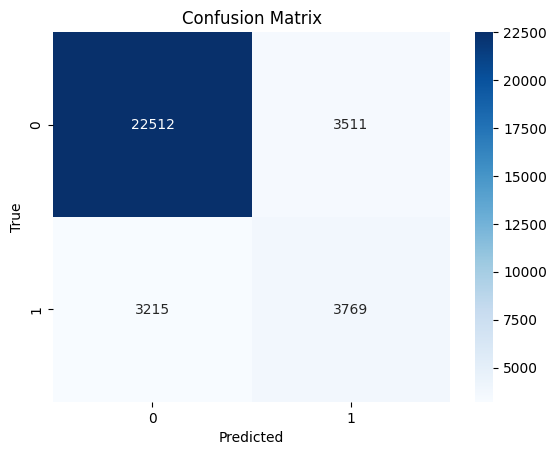

--------------------------------------------------------------------------
RandomForestClassifier
accuracy_score 0.8379131699336504
Precision Score 0.8315746753246753
Recall Score 0.2933848797250859
F1 Score 0.4337425910245555


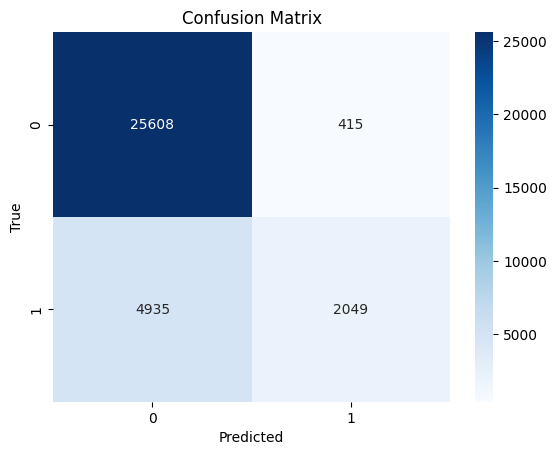

--------------------------------------------------------------------------
XGBClassifier
accuracy_score 0.8632714272730027
Precision Score 0.7343957503320053
Recall Score 0.5542668957617412
F1 Score 0.6317421460628315


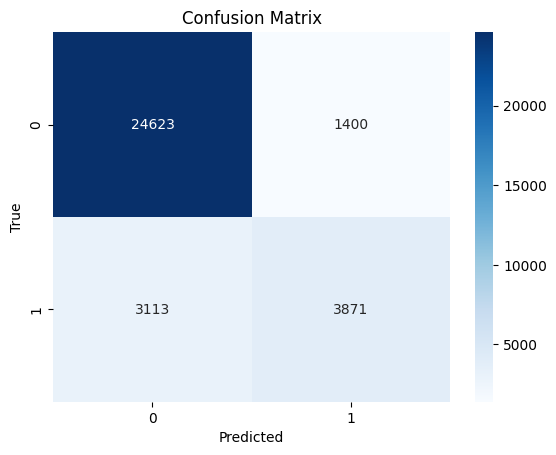

--------------------------------------------------------------------------


In [ ]:
for clf in (decision_tree, rnd_clf, xgb_model):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__)
    print('accuracy_score', accuracy_score(y_test, y_pred))
    print('Precision Score', precision_score(y_test, y_pred))
    print('Recall Score', recall_score(y_test, y_pred))
    print('F1 Score', f1_score(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred)
    , annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    print('--------------------------------------------------------------------------')

Conclusions:



*   Random forest has highest precision value but very low recall value which means that it can identify true postives very well but not good with predicting false negatives.
*  XGBoost has highest accuracy 86.3% among three models.
*   F1 score which describes balance between precision and recall is also highest for XGBoost cmodel.



### Task 3: Unsupervised Learning


*   Part A: Apply an unsupervised learning algorithm (e.g., K-Means Clustering or Hierarchical Clustering) to identify patterns or clusters in the dataset.
*   Part B: Visualize the clusters and interpret the results.

*   Part C: Discuss the advantages and limitations of using unsupervised learning in this scenario.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

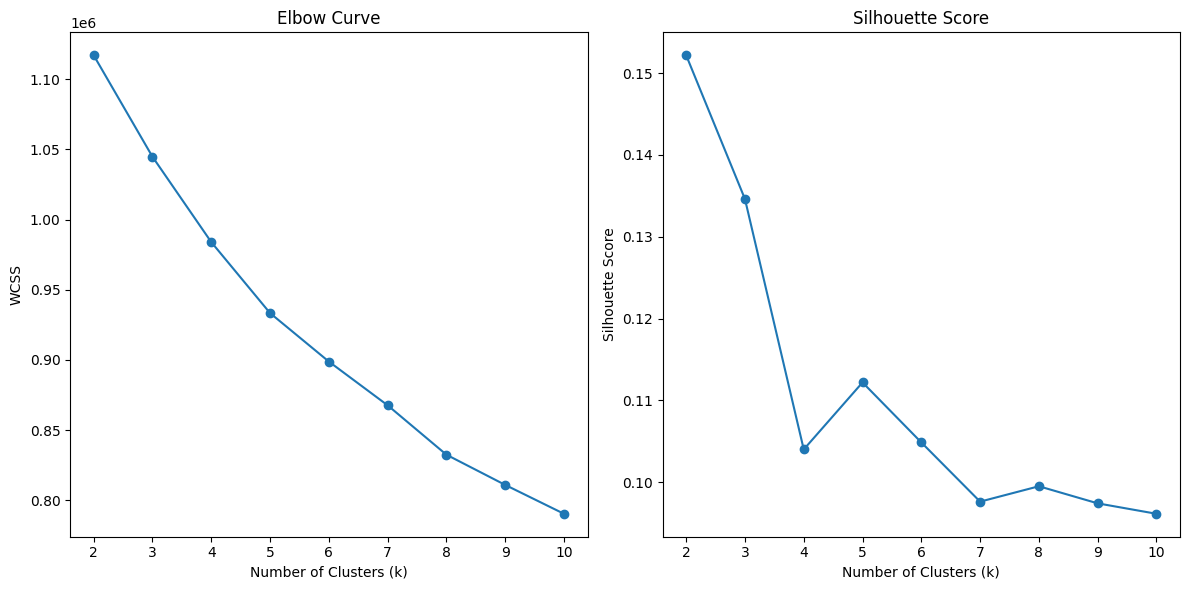

In [15]:
#K-means clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Vary the number of clusters (k)
k_range = range(2, 11)
wcss_values = []
silhouette_scores = []

for k in k_range:
    # Fit KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(processed_df)

    # Calculate WCSS
    wcss_values.append(kmeans.inertia_)

    # Calculate Silhouette Score
    if k > 1:
        silhouette_scores.append(silhouette_score(processed_df, kmeans.labels_))

# Plot the Elbow Curve (WCSS)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_range, wcss_values, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')

# Plot the Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

#5 clusters are good.

In [16]:
# Building KMeans clustering
bestmodel = KMeans(n_clusters = 5)
result = bestmodel.fit(processed_df)

# Cluster labels
bestmodel.labels_

mb = pd.Series(bestmodel.labels_)

# Concate the Results with data
df_clust = pd.concat([mb, processed_df], axis = 1)
df_clust = df_clust.rename(columns = {0:'cluster_id'})
df_clust.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,cluster_id,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0.0,HasCrCard_1.0,IsActiveMember_0.0,IsActiveMember_1.0
0,4,0.143908,-0.596933,-0.719973,-0.883163,0.814298,1.369486,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,2,-0.368605,-0.596933,-1.432694,-0.883163,0.814298,-1.254085,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,4,0.268911,0.258796,1.774548,-0.883163,0.814298,1.437422,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,1,-0.943620,-0.474686,-1.076334,1.486918,-1.013348,-0.557018,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,2,0.743923,-0.596933,-0.007253,-0.883163,0.814298,-1.938770,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


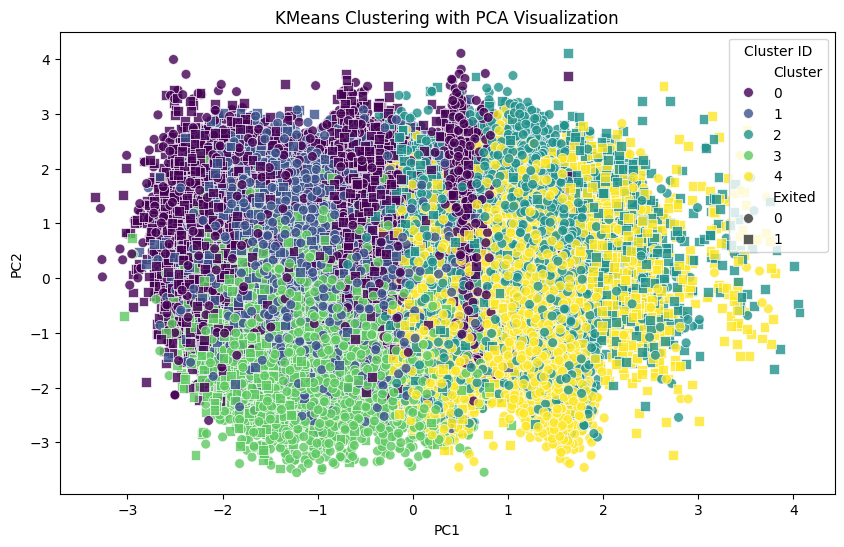

In [30]:
#Perform PCA for visulization
from sklearn.decomposition import PCA

# Fit PCA to your features
pca = PCA(n_components=2)
pca_result = pca.fit_transform(processed_df)

# Add cluster labels and 'Exited' column to the PCA result
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df_clust['cluster_id']
pca_df['Exited'] = train['Exited']

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', style='Exited', markers=["o", "s"], palette='viridis', data=pca_df, s=50, alpha=0.8)
plt.title('KMeans Clustering with PCA Visualization')
plt.legend(title='Cluster ID', loc='upper right')
plt.show()


Clusters are overlapping, it is not giving good results. Silhouette score is also less than 0.2 which shows less inter distance b/w clusters and more spread out clusters.

Task 4: Application in Predictive Analytics


*   Choose one predictive analytics application (e.g., sales forecasting or customer churn prediction).
*   Build a machine learning model to address the chosen application.
*   Evaluate the model's performance and discuss the practical implications.



In [31]:
#we also have test data set with missing target column, Exited
#load the test data for making predictions
test = pd.read_csv(r"/content/drive/MyDrive/Omdena_ML_DS/test.csv")
test.info() #110023 entries with 13 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  object 
 5   Gender           110023 non-null  object 
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 10.9+ MB


In [36]:
#We will use XGBoost model for predictions
#Hyperparameter tuning

from sklearn.model_selection import GridSearchCV
# Define the hyperparameters and their possible values for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters on the full training set
best_xgb_model = XGBClassifier(random_state=42, **best_params)
best_xgb_model.fit(X_train, y_train)''

# Evaluate the model on the test set
accuracy = best_xgb_model.score(X_test, y_test)
print("Test Accuracy:", accuracy)

Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Test Accuracy: 0.8650286302905444


In [37]:
test = test.drop(columns=['CustomerId', 'Surname', 'id'])

# Pre processing
processed_data = preprocessor.fit_transform(test)

# Get the column names after transformation
processed_numeric_cols = preprocessor.transformers_[0][1]['scaler'].get_feature_names_out(numeric_cols_pre)
processed_categorical_cols = preprocessor.transformers_[1][1]['onehot'].get_feature_names_out(categorical_cols_pre)
all_processed_cols = list(processed_numeric_cols) + list(processed_categorical_cols)

# Convert to DataFrame with column names
processed_df_test = pd.DataFrame(processed_data, columns=all_processed_cols)
processed_df_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0.0,HasCrCard_1.0,IsActiveMember_0.0,IsActiveMember_1.0
0,-0.878176,-1.706504,-1.067887,-0.881274,0.820030,0.967874,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.329567,0.888990,-1.067887,-0.881274,-1.015806,-0.790939,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,-0.006609,-0.465181,0.713922,-0.881274,0.820030,0.528413,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.304665,-0.239486,1.070284,-0.881274,-1.015806,0.032150,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,1.188684,-0.013791,1.783008,1.050038,-1.015806,0.539331,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [41]:
# Use the trained model to make predictions on the test set
test['Exited'] = best_xgb_model.predict(processed_df_test)
test.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75,0
1,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27,1
2,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09,0
3,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57,0
4,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00,0
5,593,France,Female,22.0,9,0.00,2,0.0,0.0,51907.72,0
6,682,Spain,Male,45.0,4,0.00,2,1.0,1.0,157878.67,0
7,539,Spain,Female,47.0,8,0.00,2,1.0,1.0,126784.29,0
8,845,France,Female,47.0,3,111096.91,1,1.0,0.0,94978.10,1
9,645,Spain,Male,30.0,5,0.00,2,0.0,1.0,149195.44,0


Bonus Task:


*   Implement an additional machine learning algorithm of your choice and compare its performance with the existing models.




In [42]:
#ANN model
#import the tensorflow libraries
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [47]:
#Build a sequential model
model_ANN = Sequential()

model_ANN.add(Dense(15,activation='relu',input_dim=15))
model_ANN.add(Dense(50,activation='relu'))
model_ANN.add(Dense(30,activation='relu'))
model_ANN.add(Dense(1,activation='sigmoid'))

In [48]:
#Model summary
model_ANN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 15)                240       
                                                                 
 dense_9 (Dense)             (None, 50)                800       
                                                                 
 dense_10 (Dense)            (None, 30)                1530      
                                                                 
 dense_11 (Dense)            (None, 1)                 31        
                                                                 
Total params: 2601 (10.16 KB)
Trainable params: 2601 (10.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
#Compile the model
model_ANN.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

#Fit our data
history = model_ANN.fit(X_train,y_train,epochs=15,validation_split=0.2)

Epoch 1/15
3301/3301 [==============================] - 13s 4ms/step - loss: 0.3449 - accuracy: 0.8539 - val_loss: 0.3299 - val_accuracy: 0.8604
Epoch 2/15
3301/3301 [==============================] - 11s 3ms/step - loss: 0.3286 - accuracy: 0.8618 - val_loss: 0.3271 - val_accuracy: 0.8645
Epoch 3/15
3301/3301 [==============================] - 10s 3ms/step - loss: 0.3267 - accuracy: 0.8622 - val_loss: 0.3253 - val_accuracy: 0.8641
Epoch 4/15
3301/3301 [==============================] - 10s 3ms/step - loss: 0.3261 - accuracy: 0.8629 - val_loss: 0.3241 - val_accuracy: 0.8660
Epoch 5/15
3301/3301 [==============================] - 11s 3ms/step - loss: 0.3254 - accuracy: 0.8629 - val_loss: 0.3240 - val_accuracy: 0.8651
Epoch 6/15
3301/3301 [==============================] - 10s 3ms/step - loss: 0.3248 - accuracy: 0.8631 - val_loss: 0.3254 - val_accuracy: 0.8629
Epoch 7/15
3301/3301 [==============================] - 12s 3ms/step - loss: 0.3246 - accuracy: 0.8628 - val_loss: 0.3245 - val_ac



*   The accuracy from ANN is almost same as that of XGBoost model i.e. 86.3%
*   The hyperparameter tuning of XGBoost model is not improving the accuarcy very effectively.
*  Simple XGBoost model is best for our case of Churn predictions.



